# check file +/- 3 months

In [1]:
import os
import numpy as np
import pickle as pkl
import netCDF4 as nc4
import xarray as xr
import pandas as pd

In [2]:
from src.data_preparation import merge_TOPAZ 

In [3]:
from importlib import reload

In [10]:
import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [107]:
reload(merge_TOPAZ)

<module 'src.data_preparation.merge_TOPAZ' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/merge_TOPAZ.py'>

In [99]:
sit, chrono = merge_TOPAZ.load_nc()

Loading ML-SIT...
	1992-1998
	1999-2010
	2011-2022
Merging...


In [108]:
sic_fr, chrono_fr = merge_TOPAZ.load_sic_fr(adjSIC=True)

Loading SIC freerun...
	1991-1998
	1999-2010
	2011-2022
Merging...


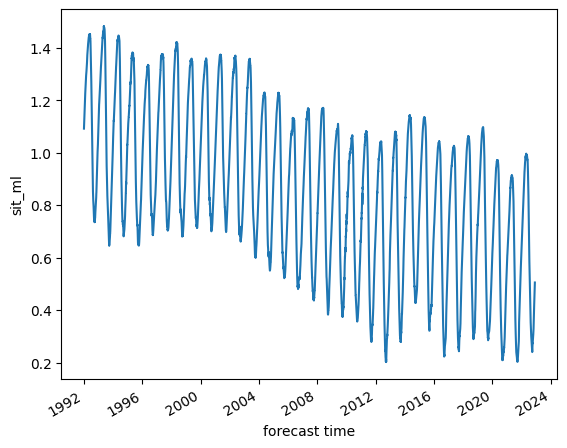

In [100]:
sit.mean(('x','y')).plot()

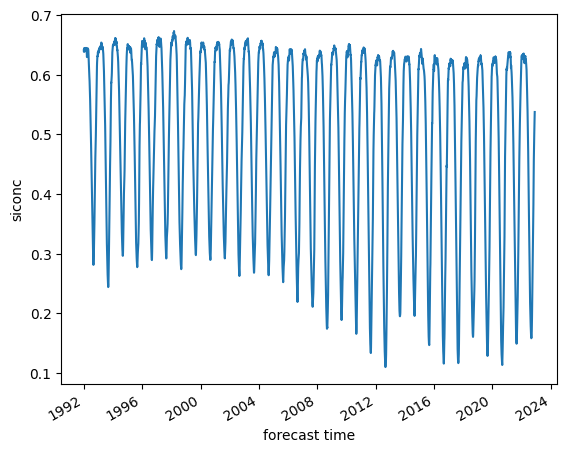

In [109]:
sic_fr.mean(('x','y')).plot()

In [110]:
# average only SIC > 15%
sit_c15 = sit.where(sic_fr>.15).mean(dim=('y','x')).compute()

In [21]:
import matplotlib.pyplot as plt

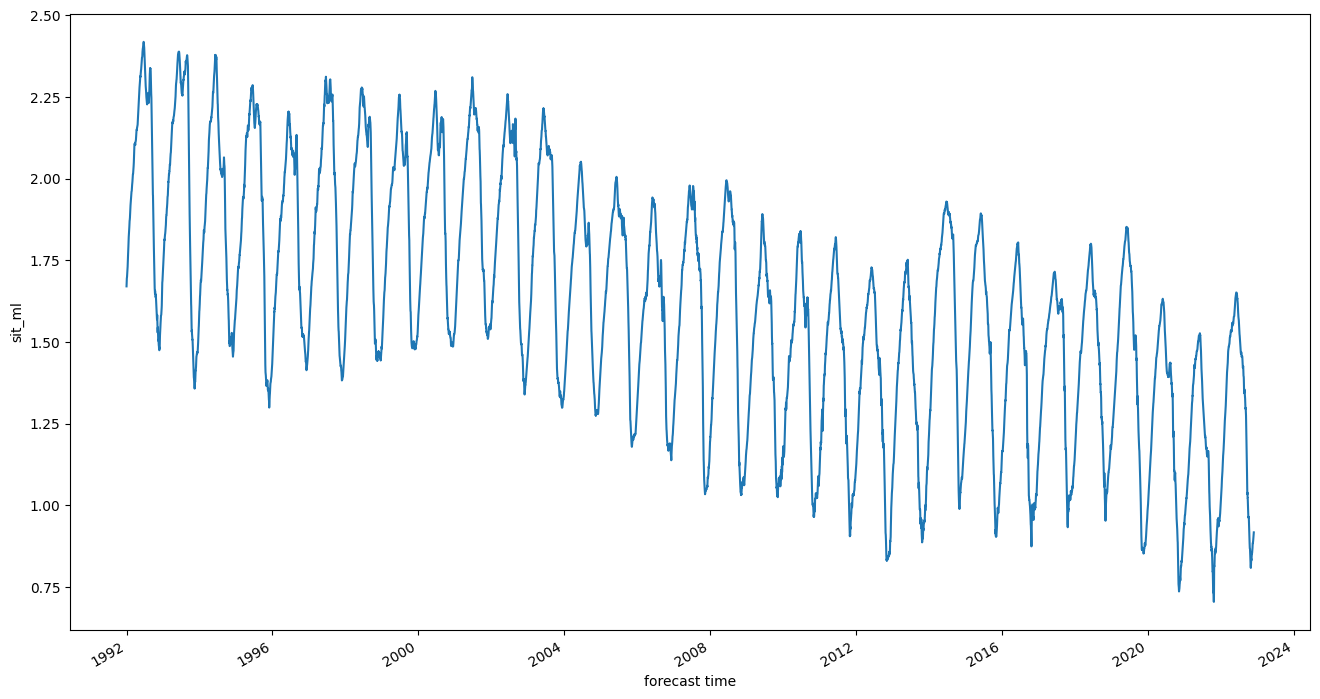

In [111]:
fig, axes = plt.subplots(figsize=(16, 8))

sit_c15.plot()

In [23]:
# ifolder = '/scratch/project_465000269/edelleo1/Leo/results/lstm_240507-160336/ml/'
ifolder = '/scratch/project_465000269/edelleo1/Leo/results/lstm_240523-170100/ml/'  # for_paper_3 opti v2 - batch size = 32 + SIA


ifile = 'sit_gLSTM3_bk_1991_1999_01.nc'
f1 = f'{ifolder}{ifile}'
    
    #       Import 1999-2010
    # ---------------------------------
    
ifile = 'sit_gLSTM3_bk_1998_2011_01.nc'
f2 = f'{ifolder}{ifile}'
    
    #       Import 2011-2022
    # ---------------------------------
    
ifile = 'sit_gLSTM3_bk_2011_2022_01.nc'
f3 = f'{ifolder}{ifile}'
    
    #       Merge prediction and training
    # ---------------------------------------------
    

sit_1 = xr.open_mfdataset([f1], combine='nested', concat_dim='time')['sit_ml']    
sit_2 = xr.open_mfdataset([f2], combine='nested', concat_dim='time')['sit_ml']
sit_3 = xr.open_mfdataset([f3], combine='nested', concat_dim='time')['sit_ml']

# sit_ml = xr.open_mfdataset([f1,f2,f3], combine='nested', concat_dim='time')['sit_ml']

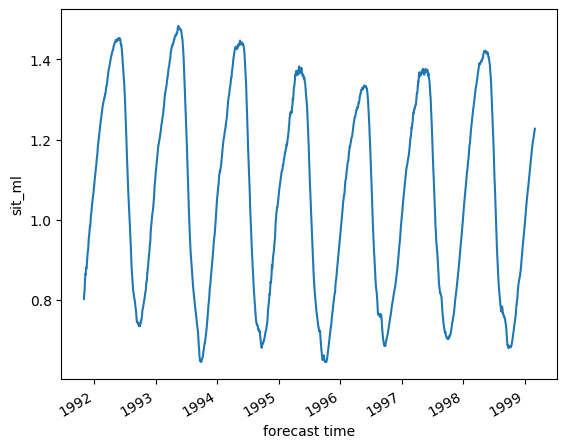

In [24]:
sit_1.mean(('x','y')).plot()

In [69]:
chrono_1 = pd.DataFrame({'date':pd.to_datetime(sit_1.time)})

In [71]:
chrono_1_dt = np.array([dt.date() for dt in chrono_1.date])

In [75]:
import datetime

In [79]:
sit_1.time

<xarray.DataArray 'time' (time: 2739)>
array(['1991-10-01T00:00:00.000000000', '1991-10-02T00:00:00.000000000',
       '1991-10-03T00:00:00.000000000', ..., '1999-03-29T00:00:00.000000000',
       '1999-03-30T00:00:00.000000000', '1999-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-10-01 1991-10-02 ... 1999-03-31
Attributes:
    long_name:  forecast time

In [81]:
return_idx_dates(sit_1.time, datetime.date(1992,1,1), datetime.date(1998,12,31))

(92, 2648)

In [80]:
def return_idx_dates(arr, d1, d2):
    '''
    Return indexes (location) of day 1 and day 2 in time array
    
    
    Parametres:
    -----------
    
        arr          :   xarray.DataArray 'time'
        d1           :   datetime.date() object, day 1 to identify
        d2           :   datetime.date() object, day 2 to identify
    '''
    
    chrono = pd.DataFrame({'date':pd.to_datetime(arr)})
    chrono_dt = np.array([dt.date() for dt in chrono.date])
    
    idx1 = np.where(chrono_1_dt==d1)[0][0]
    idx2 = np.where(chrono_1_dt==d2)[0][0]
    
    return idx1, idx2

In [78]:
np.where(chrono_1_dt==datetime.date(1992,1,1))[0][0]

92

In [67]:
sit_1.time

<xarray.DataArray 'time' (time: 2739)>
array(['1991-10-01T00:00:00.000000000', '1991-10-02T00:00:00.000000000',
       '1991-10-03T00:00:00.000000000', ..., '1999-03-29T00:00:00.000000000',
       '1999-03-30T00:00:00.000000000', '1999-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-10-01 1991-10-02 ... 1999-03-31
Attributes:
    long_name:  forecast time

In [60]:
sit_12 = xr.concat([sit_1.isel(time=slice(None, -91)), sit_2.isel(time=slice(92,None))], dim="time")

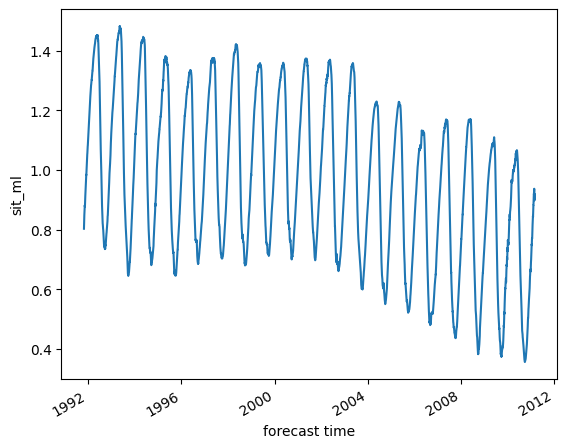

In [62]:
sit_12.mean(('x','y')).plot()

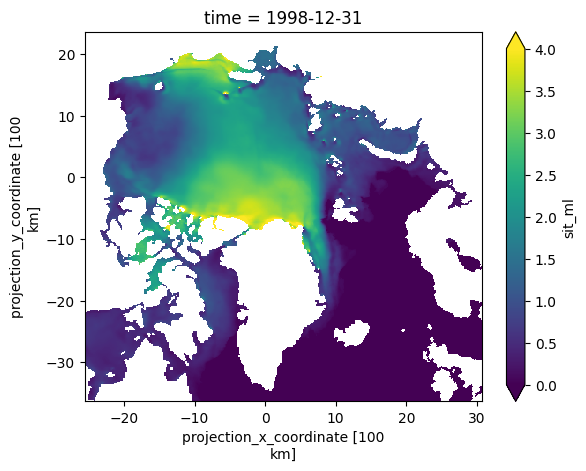

In [43]:
sit_1.isel(time=-91).plot(vmin=0, vmax=4)

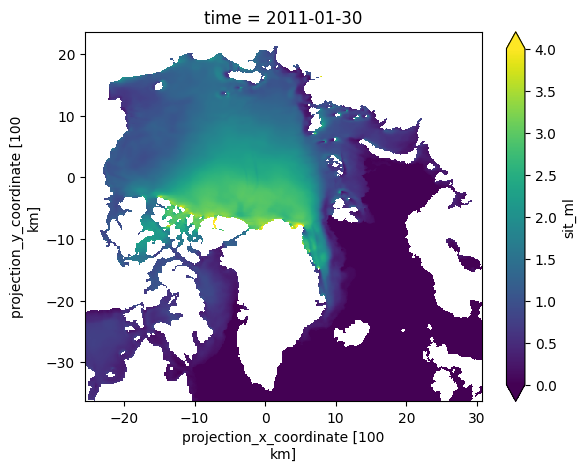

In [95]:
sit_2.isel(time=-61).plot(vmin=0, vmax=4)

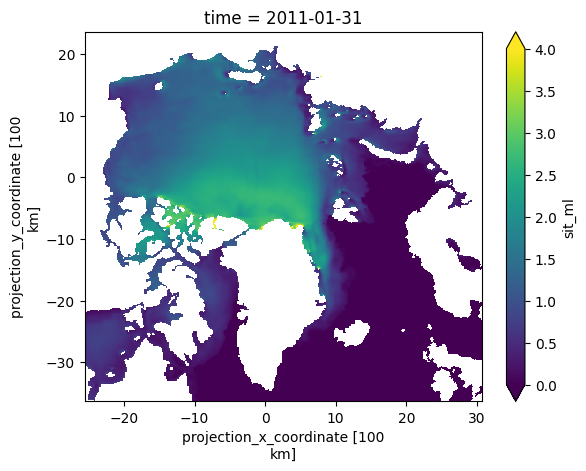

In [97]:
sit_3.isel(time=30).plot(vmin=0, vmax=4)

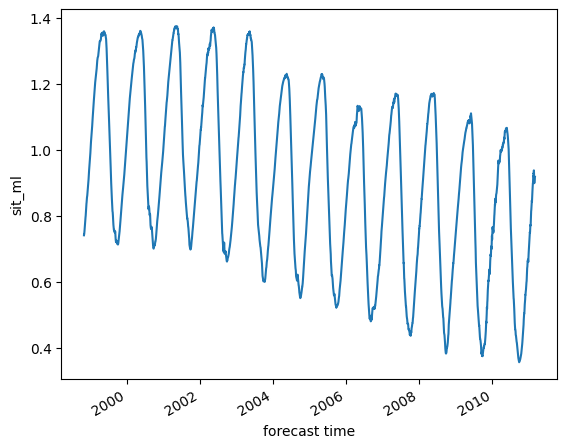

In [25]:
sit_2.mean(('x','y')).plot()

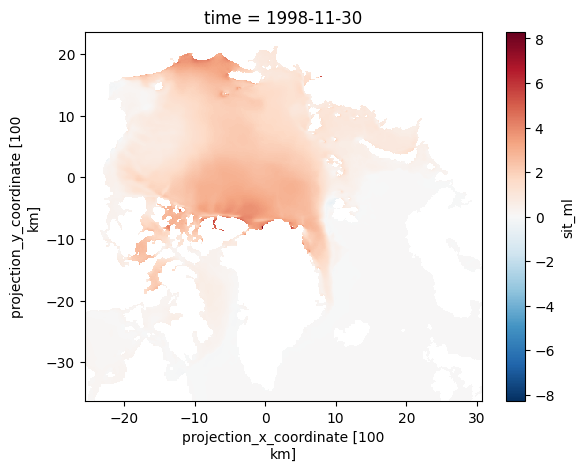

In [53]:
sit_2.isel(time=60).plot()

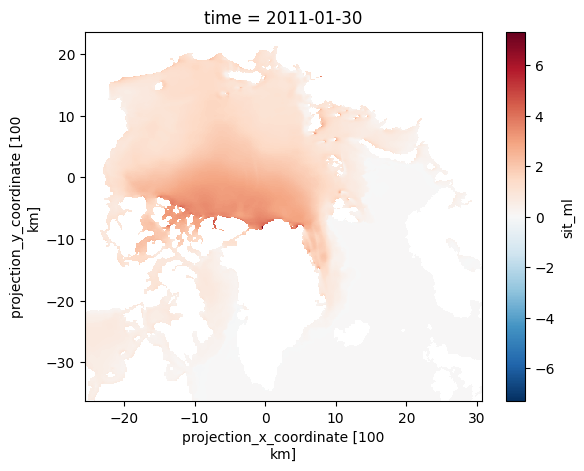

In [49]:
sit_2.isel(time=-61).plot()

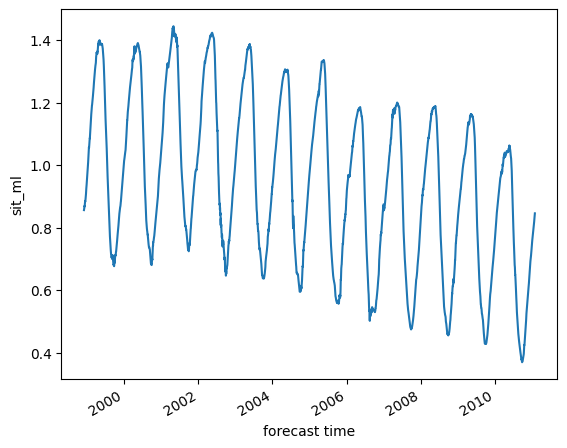

In [25]:
sit_2.mean(('x','y')).plot()

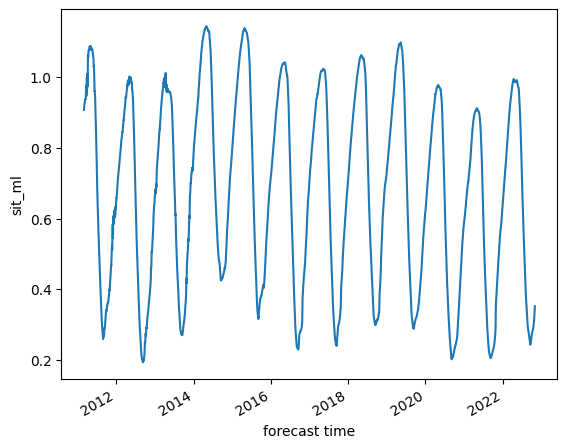

In [26]:
sit_3.mean(('x','y')).plot()

In [57]:
sit_3.time

<xarray.DataArray 'time' (time: 4383)>
array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', ..., '2022-12-29T00:00:00.000000000',
       '2022-12-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2022-12-31
Attributes:
    long_name:  forecast time

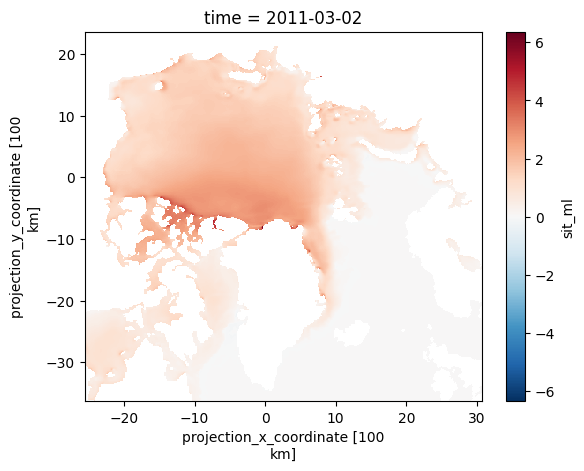

In [62]:
sit_3.isel(time=60).plot()

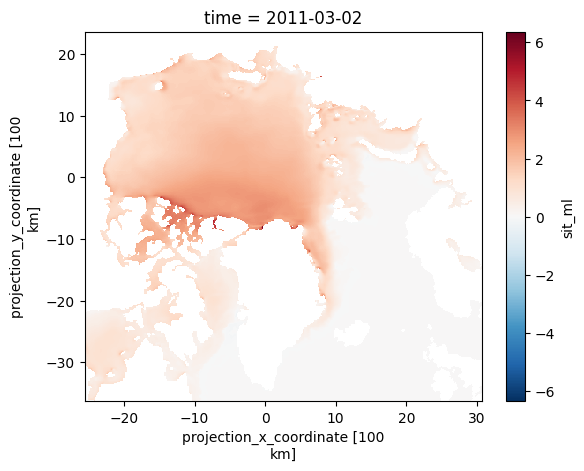

In [56]:
sit_3.isel(time=60).plot()

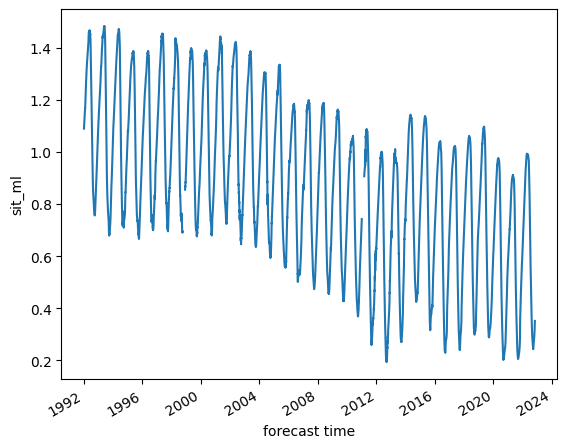

In [6]:
sit.mean(('x','y')).plot()

In [16]:
sit.time.isel(time=slice(2400,2600))

<xarray.DataArray 'time' (time: 200)>
array(['1998-07-28T00:00:00.000000000', '1998-07-29T00:00:00.000000000',
       '1998-07-30T00:00:00.000000000', '1998-07-31T00:00:00.000000000',
       '1998-08-01T00:00:00.000000000', '1998-08-02T00:00:00.000000000',
       '1998-08-03T00:00:00.000000000', '1998-08-04T00:00:00.000000000',
       '1998-08-05T00:00:00.000000000', '1998-08-06T00:00:00.000000000',
       '1998-08-07T00:00:00.000000000', '1998-08-08T00:00:00.000000000',
       '1998-08-09T00:00:00.000000000', '1998-08-10T00:00:00.000000000',
       '1998-08-11T00:00:00.000000000', '1998-08-12T00:00:00.000000000',
       '1998-08-13T00:00:00.000000000', '1998-08-14T00:00:00.000000000',
       '1998-08-15T00:00:00.000000000', '1998-08-16T00:00:00.000000000',
       '1998-08-17T00:00:00.000000000', '1998-08-18T00:00:00.000000000',
       '1998-08-19T00:00:00.000000000', '1998-08-20T00:00:00.000000000',
       '1998-08-21T00:00:00.000000000', '1998-08-22T00:00:00.000000000',
       '1998-08-23T00:00:00.000000000', '1998-08-24T00:00:00.000000000',
       '1998-08-25T00:00:00.000000000', '1998-08-26T00:00:00.000000000',
       '1998-08-27T00:00:00.000000000', '1998-08-28T00:00:00.000000000',
       '1998-08-29T00:00:00.000000000', '1998-08-30T00:00:00.000000000',
       '1998-08-31T00:00:00.000000000', '1998-09-01T00:00:00.000000000',
       '1998-09-02T00:00:00.000000000', '1998-09-03T00:00:00.000000000',
       '1998-09-04T00:00:00.000000000', '1998-09-05T00:00:00.000000000',
       '1998-09-06T00:00:00.000000000', '1998-09-07T00:00:00.000000000',
       '1998-09-08T00:00:00.000000000', '1998-09-09T00:00:00.000000000',
       '1998-09-10T00:00:00.000000000', '1998-09-11T00:00:00.000000000',
       '1998-09-12T00:00:00.000000000', '1998-09-13T00:00:00.000000000',
       '1998-09-14T00:00:00.000000000', '1998-09-15T00:00:00.000000000',
       '1998-09-16T00:00:00.000000000', '1998-09-17T00:00:00.000000000',
       '1998-09-18T00:00:00.000000000', '1998-09-19T00:00:00.000000000',
       '1998-09-20T00:00:00.000000000', '1998-09-21T00:00:00.000000000',
       '1998-09-22T00:00:00.000000000', '1998-09-23T00:00:00.000000000',
       '1998-09-24T00:00:00.000000000', '1998-09-25T00:00:00.000000000',
       '1998-09-26T00:00:00.000000000', '1998-09-27T00:00:00.000000000',
       '1998-09-28T00:00:00.000000000', '1998-09-29T00:00:00.000000000',
       '1998-09-30T00:00:00.000000000', '1998-10-01T00:00:00.000000000',
       '1998-10-02T00:00:00.000000000', '1998-10-03T00:00:00.000000000',
       '1998-10-04T00:00:00.000000000', '1998-10-05T00:00:00.000000000',
       '1998-10-06T00:00:00.000000000', '1998-10-07T00:00:00.000000000',
       '1998-10-08T00:00:00.000000000', '1998-10-09T00:00:00.000000000',
       '1998-10-10T00:00:00.000000000', '1998-10-11T00:00:00.000000000',
       '1998-10-12T00:00:00.000000000', '1998-10-13T00:00:00.000000000',
       '1998-10-14T00:00:00.000000000', '1998-10-15T00:00:00.000000000',
       '1998-10-16T00:00:00.000000000', '1998-10-17T00:00:00.000000000',
       '1998-10-18T00:00:00.000000000', '1998-10-19T00:00:00.000000000',
       '1998-10-20T00:00:00.000000000', '1998-10-21T00:00:00.000000000',
       '1998-10-22T00:00:00.000000000', '1998-10-23T00:00:00.000000000',
       '1998-10-24T00:00:00.000000000', '1998-10-25T00:00:00.000000000',
       '1998-10-26T00:00:00.000000000', '1998-10-27T00:00:00.000000000',
       '1998-10-28T00:00:00.000000000', '1998-10-29T00:00:00.000000000',
       '1998-10-30T00:00:00.000000000', '1998-10-31T00:00:00.000000000',
       '1998-11-01T00:00:00.000000000', '1998-11-02T00:00:00.000000000',
       '1998-11-03T00:00:00.000000000', '1998-11-04T00:00:00.000000000',
       '1998-11-05T00:00:00.000000000', '1998-11-06T00:00:00.000000000',
       '1998-11-07T00:00:00.000000000', '1998-11-08T00:00:00.000000000',
       '1998-11-09T00:00:00.000000000', '1998-11-10T00:00:00.000000000',
       '1998-11-11T00:00:00.000000000', '1998-11-12T00:00:00.000000000',
       '1998-11-13T0

# ____________________________________________________________________

In [9]:
idir = '/scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j150-629/'
filename = 'sithick_TOPAZ4b23_2011_2022_FreeRun.nc'

nc = nc4.Dataset(f'{idir}{filename}', mode='r')
X = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sithick']
chrono = pd.DataFrame({'date':pd.to_datetime(X['time'].to_numpy())})

chrono

,date
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
4378,2022-12-27
4379,2022-12-28
4380,2022-12-29
4381,2022-12-30


In [10]:
idir = '/scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j150-629/'
filename = 'sithick_TOPAZ4b23_1999_2010_FreeRun.nc'

nc = nc4.Dataset(f'{idir}{filename}', mode='r')
X = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sithick']
chrono = pd.DataFrame({'date':pd.to_datetime(X['time'].to_numpy())})

chrono

,date
0,1998-10-01
1,1998-10-02
2,1998-10-03
3,1998-10-04
4,1998-10-05
...,...
4560,2011-03-27
4561,2011-03-28
4562,2011-03-29
4563,2011-03-30


In [11]:
idir = '/scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j150-629/'
filename = 'sithick_TOPAZ4b23_1999_2010_FreeRun_adjSIC.nc'

nc = nc4.Dataset(f'{idir}{filename}', mode='r')
X = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sithick']
chrono = pd.DataFrame({'date':pd.to_datetime(X['time'].to_numpy())})

chrono

,date
0,1998-10-01
1,1998-10-02
2,1998-10-03
3,1998-10-04
4,1998-10-05
...,...
4560,2011-03-27
4561,2011-03-28
4562,2011-03-29
4563,2011-03-30


In [27]:
ls = ['-']*6 + ['--']*6 + ['-.']*6 + [':']*6 + [(0, (3, 1, 1, 1, 1, 1))]*6

In [1]:
import matplotlib.pyplot as plt

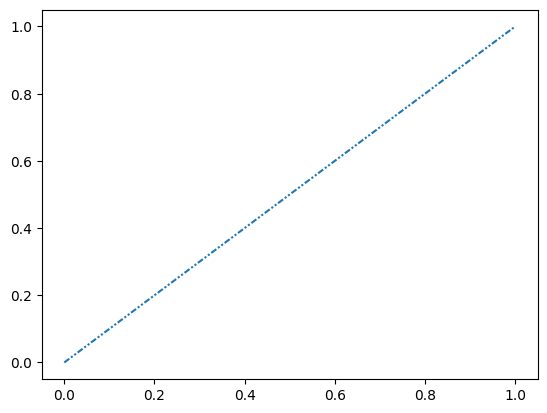

In [29]:
plt.plot([0,1], [0,1], ls=ls[-1])